# [G Henry Jacob](https://www.linkedin.com/in/henry-jacob-96872918a/)

### Task #1: Prediction using Supervised ML

![](task1.jpg)

#### Data can be found at <code>[here](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)<code>

### Collecting data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# create dataframe 
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# to see top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Analysing

In [5]:
# to know the shape of dataframe
df.shape

(25, 2)

There are 25 rows and 2 columns

In [6]:
avg_hour = df['Hours'].mean()
avg_score = df['Scores'].mean()
print(f'Students studied for {avg_hour} hours by average and scored in an average of {avg_score} marks')

Students studied for 5.012 hours by average and scored in an average of 51.48 marks


In [7]:
min_hour = df['Hours'].min()
max_hour = df['Hours'].max()
min_score = df['Scores'].min()
max_score = df['Scores'].max()
print(f'Minimum hour studied :{min_hour}')
print(f'Maximum hour studied :{max_hour}')
print(f'Minimum scored mark :{min_score}')
print(f'Maximum scored mark :{max_score}')

Minimum hour studied :1.1
Maximum hour studied :9.2
Minimum scored mark :17
Maximum scored mark :95


In [8]:
# We can check our min, max,... here too
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
# To see correlation
correlation = df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


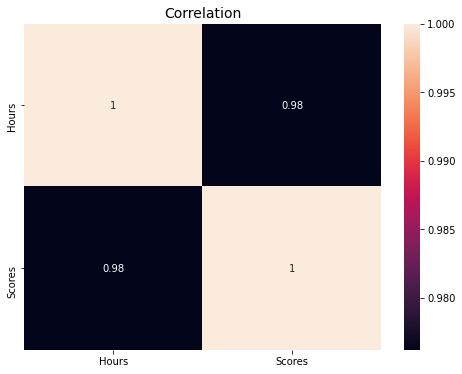

In [11]:
# To see visually 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot = True)
plt.title('Correlation', fontsize = 14)
plt.show()

Hours and Scores have correlation value of 0.98. It's almost equals to 1. They are highly correlated

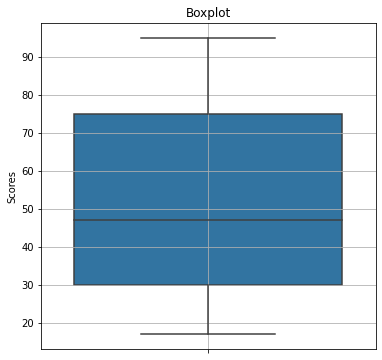

In [12]:
# Boxplot for Scores
plt.figure(figsize = (6, 6)) 
sns.boxplot(y = df['Scores'])
plt.title('Boxplot')
plt.grid(True)
plt.show()

The above figure infers that median of the scored mark is 47, the first quartile and third quartile values are 30 and 75

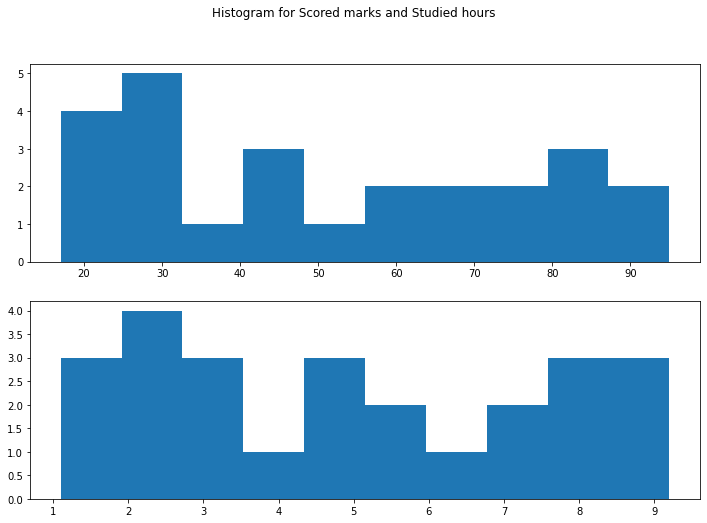

In [13]:
#Plot two histogram for Scored marks and Studied hours using subplots  
plt.rcParams['figure.figsize'] = (12, 8)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histogram for Scored marks and Studied hours')
ax1.hist(df['Scores'], bins = 10)
ax2.hist(df['Hours'])
plt.show()

More students scored nearly 10 to 33 marks and more number of student(4) studied 2-3 hours only

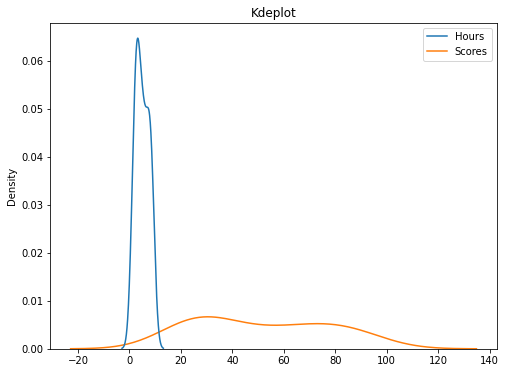

In [14]:
# Kdeplot
plt.figure(figsize = (8, 6))
sns.kdeplot(data = df)
plt.title('Kdeplot')
plt.show()

c:\users\rani\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


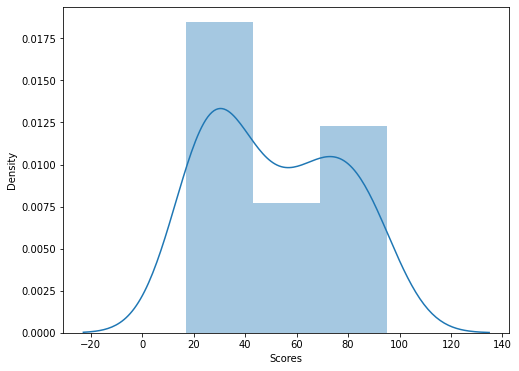

In [15]:
# distplot
plt.figure(figsize = (8, 6))
sns.distplot(df['Scores'])
plt.show()

The above figure shows how the data is distributed

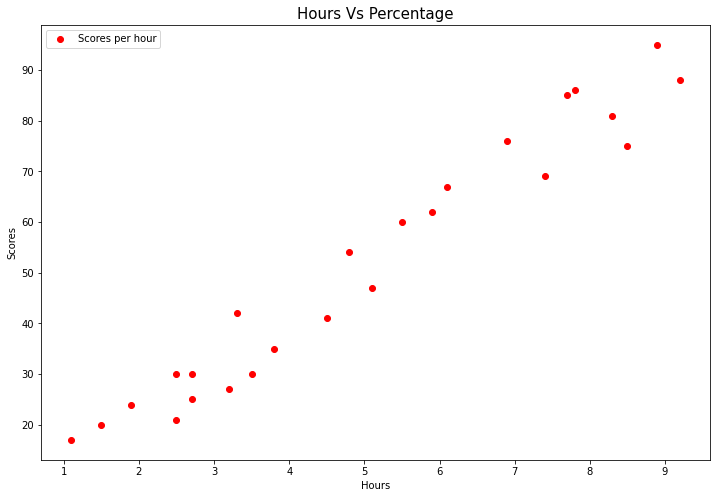

In [16]:
# Plot the values on scatter plot
plt.rcParams['figure.figsize'] = (12, 8)
plt.scatter(df['Hours'], df['Scores'], marker='o', color = 'red', label = 'Scores per hour')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Percentage', fontsize = 15)
plt.legend()
plt.show()

The above figure infers that **the more Hours a student studies the more he/she scores**. If a student study more than 5 hours he/she can score more than average mark of all students.

### Data Wrangling

In [17]:
# To see null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

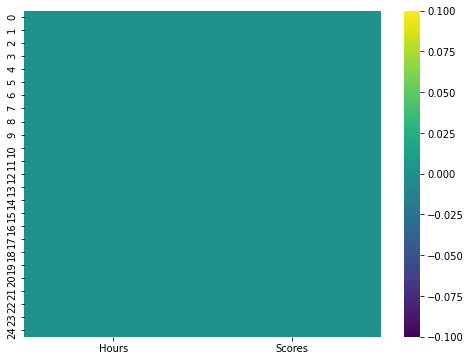

In [18]:
# To see visually
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cmap = 'viridis')

There is no **null values** in the given data.

### Training and Testing

In [19]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

In [20]:
X = df.iloc[:, :-1].copy()
y = df.iloc[:, 1].copy()

In [21]:
#Split our data in random manner with the ratio of 80:20, whereas 80% of data for training and 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
len(X_train), len(X_test)

(20, 5)

We split our dataset 20 for training and 5 for testing

In [23]:
# Build a linear model
lr_model_1 = sm.OLS(y_train, X_train).fit()

In [24]:
print(lr_model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2111.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                    6.12e-21
Time:                        01:39:13   Log-Likelihood:                         -62.925
No. Observations:                  20   AIC:                                      127.8
Df Residuals:                      19   BIC:                                      128.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

---

We get **R-squared value of :0.991**, **Adj. R-squared :0.991**(same value) and P value for Hours is also 0. There is no redundant feature. <br>Let's add a constant and check whether our model gets improved or not

In [25]:
X_train_2 = sm.add_constant(X_train)
lr_model_2 = sm.OLS(y_train, X_train_2).fit()

In [26]:
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           2.79e-13
Time:                        01:39:13   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.5

---

#### Value after adding a constant
**R-squared:0.952**, **Adj. R-squared:0.949**

R-squared value decreased as well as Adj. R-squared value. There is a small difference between both values too.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h4>Adding a constant in data, decrease the R-squared value.</h4>
<h4>So let's go with without adding constant (as it is)</h4>
</div>


### **Equation for Linear regression**  
### $y = mx + c$

y : Score<br>c : Intercept<br>m : coefficient of the feature

In [27]:
# create instance for model
lin_model = LinearRegression()

In [28]:
# fit model with training set
lin_model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the output for training set
train_pred = lin_model.predict(X_train)

In [30]:
# Compare the actual and predicted data in training set
train_df = pd.DataFrame({'Actual':y_train, 'Prediction':np.round(train_pred, 3)})
train_df

,Actual,Prediction
22,35,39.679
17,24,20.848
24,86,79.321
23,76,70.402
14,17,12.920
1,47,52.563
10,85,78.330
13,42,34.723
8,81,84.277
6,88,93.196


In [31]:
# B0 = Intercept, B1 = Slope of line
B0 = lin_model.intercept_
B1 = lin_model.coef_
print(f'Intercept :{B0} and coefficients :{B1}')

Intercept :2.018160041434669 and coefficients :[9.91065648]


In [32]:
# Regression line
reg_line = B0 + B1 * X_train

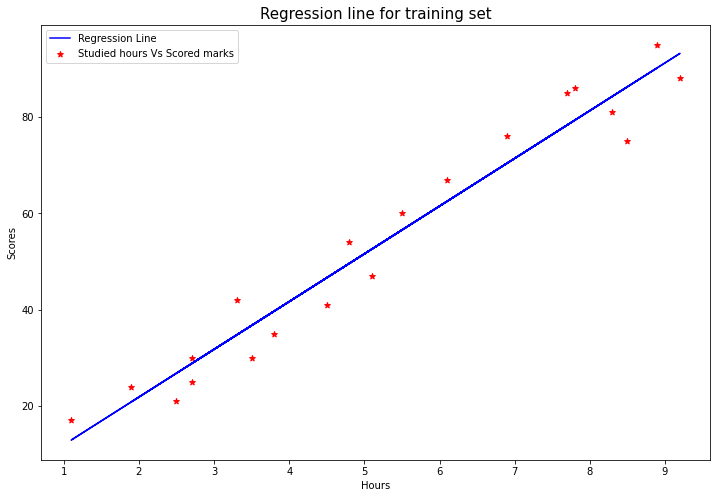

In [33]:
# Plot figure for training set
plt.scatter(X_train, y_train, color = 'red', marker = '*', label = 'Studied hours Vs Scored marks')
plt.plot(X_train, reg_line, '-b', label = 'Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression line for training set', fontsize = 15)
plt.legend()
plt.show()

In [34]:
# Predict output for test set
test_pred = lin_model.predict(X_test)

In [35]:
# Compare the actual and predicted data in test set
test_df = pd.DataFrame({'Actual':y_test, 'Prediction':np.round(test_pred, 3)})
test_df

,Actual,Prediction
5,20,16.884
2,27,33.732
19,69,75.357
16,30,26.795
11,62,60.491


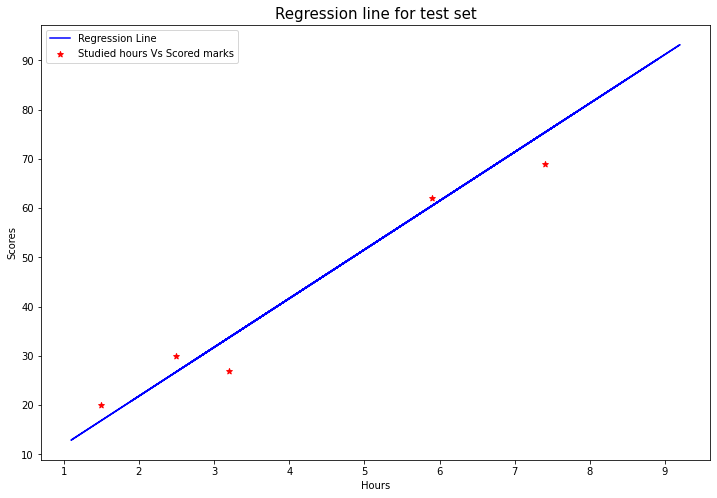

In [36]:
# Plot figure for test set
plt.scatter(X_test, y_test, color = 'red', marker = '*', label = 'Studied hours Vs Scored marks')
plt.plot(X_train, reg_line, '-b', label = 'Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Regression line for test set', fontsize = 15)
plt.legend()
plt.show()

### Evaluation

In [37]:
# import libraries
from sklearn.metrics import mean_squared_error, r2_score

#### **Mean squared error**(without sklearn library)

##### **formula for mean squared error**  
### $(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - y_{i}\hat{})^{2}$

In [38]:
sse = (y_test - test_pred)**2
sse

5      9.708554
2     45.323335
19    40.411678
16    10.273299
11     2.276981
Name: Scores, dtype: float64

In [39]:
mse = np.mean(sse)
print(f'Mean squared error(without sklearn) :{mse}')

Mean squared error(without sklearn) :21.598769307217413


#### **Mean squared error**(using sklearn library)

In [40]:
mse_1 = mean_squared_error(y_test, test_pred)
print(f'Mean squared error(using sklearn) :{mse_1}')

Mean squared error(using sklearn) :21.598769307217413


#### **Root Mean squared error**

In [41]:
rmse = np.sqrt(mse)
print(f'Root Mean squared error :{rmse}')

Root Mean squared error :4.647447612100368


---

#### **r2 score**(without sklearn library)

##### **formula for mean squared error**  
### $1 - \frac{(y_{i} - y_{i}\hat{})^{2}}{(y_{i} - \bar{y_{i}})^{2}}$

In [42]:
# We already calculated sse value above
sse

5      9.708554
2     45.323335
19    40.411678
16    10.273299
11     2.276981
Name: Scores, dtype: float64

In [43]:
sse_sum = sse.sum()
sst = (y_test - np.mean(y_test))**2
sst_sum = sst.sum()
sse_sum, sst_sum

(107.99384653608706, 1981.1999999999998)

In [44]:
r2 = (sst_sum - sse_sum)/sst_sum
print(f'r2 score(without sklearn) :{r2}')

r2 score(without sklearn) :0.9454906892105356


#### **r2 score**(using sklearn library)

In [45]:
r2_ = r2_score(y_test, test_pred)
print(f'r2 score(using sklearn) :{r2_}')

r2 score(using sklearn) :0.9454906892105355


---

### Question : What will be the predicted score if a student studies for **9.25hrs/day**?

In [46]:
ans = lin_model.predict([[9.25]])
print(f'Predicted score for a student who studied for 9.25hrs/day is :{ans}')

Predicted score for a student who studied for 9.25hrs/day is :[93.69173249]


From the above result we can say that if a student studied for **9.25 hours/day**, He/She will score **93.69 marks**